In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'/home/ubundu/Downloads/Credit_Card_Fraud_Detection.csv')
df.head()


,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
df.shape

(690, 17)

In [4]:
df.corr(numeric_only=True)

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
Unnamed: 0,1.000000,-0.024576,0.013675,-0.042587,-0.016897,-0.001634,0.035242,-0.029121,-0.059065,0.016731,-0.086148,-0.065923,-0.046221,-0.071043,0.019122,-0.006371,-0.014121
Customer_ID,-0.024576,1.000000,-0.017669,0.001531,0.048405,0.071517,-0.053314,-0.056552,0.055084,0.041009,0.019781,-0.006900,-0.002839,0.015464,-0.020295,0.040060,0.035400
A_1,0.013675,-0.017669,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A_2,-0.042587,0.001531,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A_3,-0.016897,0.048405,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A_4,-0.001634,0.071517,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A_5,0.035242,-0.053314,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A_6,-0.029121,-0.056552,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A_7,-0.059065,0.055084,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A_8,0.016731,0.041009,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407


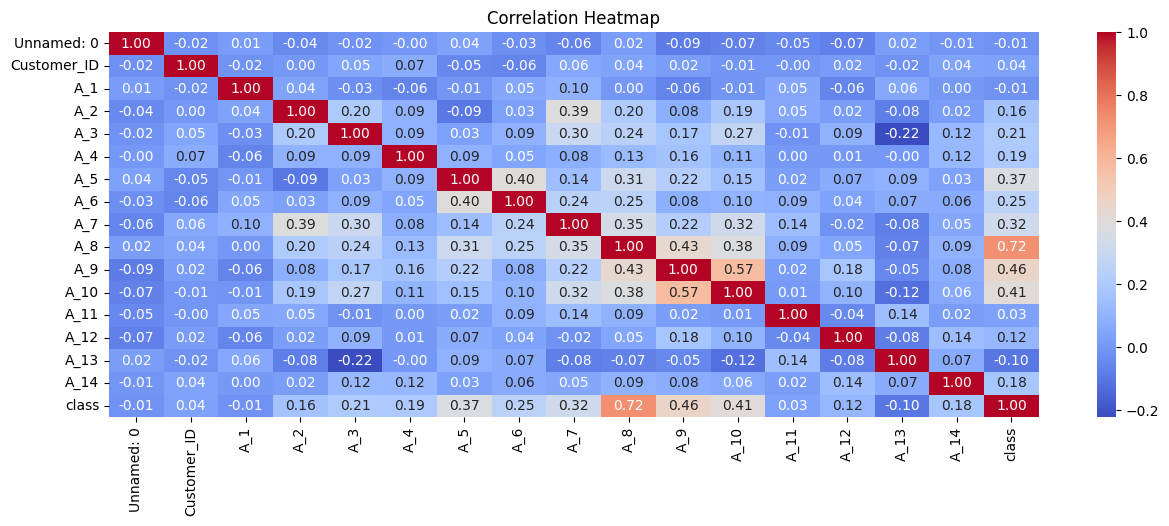

In [5]:
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   690 non-null    int64  
 1   Customer_ID  690 non-null    int64  
 2   A_1          690 non-null    int64  
 3   A_2          690 non-null    float64
 4   A_3          690 non-null    float64
 5   A_4          690 non-null    int64  
 6   A_5          690 non-null    int64  
 7   A_6          690 non-null    int64  
 8   A_7          690 non-null    float64
 9   A_8          690 non-null    int64  
 10  A_9          690 non-null    int64  
 11  A_10         690 non-null    int64  
 12  A_11         690 non-null    int64  
 13  A_12         690 non-null    int64  
 14  A_13         690 non-null    int64  
 15  A_14         690 non-null    int64  
 16  class        690 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 91.8 KB


In [7]:
df.isna().sum()

Unnamed: 0     0
Customer_ID    0
A_1            0
A_2            0
A_3            0
A_4            0
A_5            0
A_6            0
A_7            0
A_8            0
A_9            0
A_10           0
A_11           0
A_12           0
A_13           0
A_14           0
class          0
dtype: int64

In [8]:
x= df.drop('class',axis=1)
y=df['class']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=1)

In [10]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [11]:
svm_pred=svm.predict(x_test)
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [12]:
svm.score(x_test,y_test)

0.4492753623188406

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


In [14]:
kernel1=SVC(kernel='linear')
kernel1.fit(x_train,y_train)

SVC(kernel='linear')

In [15]:
kernel1.score(x_test,y_test)

0.5362318840579711

In [16]:
kernel2=SVC(kernel='poly')
kernel2.fit(x_train,y_train)

SVC(kernel='poly')

In [17]:
kernel2.score(x_test,y_test)

0.4492753623188406

In [18]:
kernel3=SVC(kernel='rbf')
kernel3.fit(x_train,y_train)

SVC()

In [19]:
kernel3.score(x_test,y_test)

0.4492753623188406

In [20]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

/home/ubundu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
logistic_prediction=logistic.predict(x_test)
logistic_prediction

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [22]:
logistic.score(x_test,y_test)

0.5507246376811594

Text(0, 0.5, 'Data values')

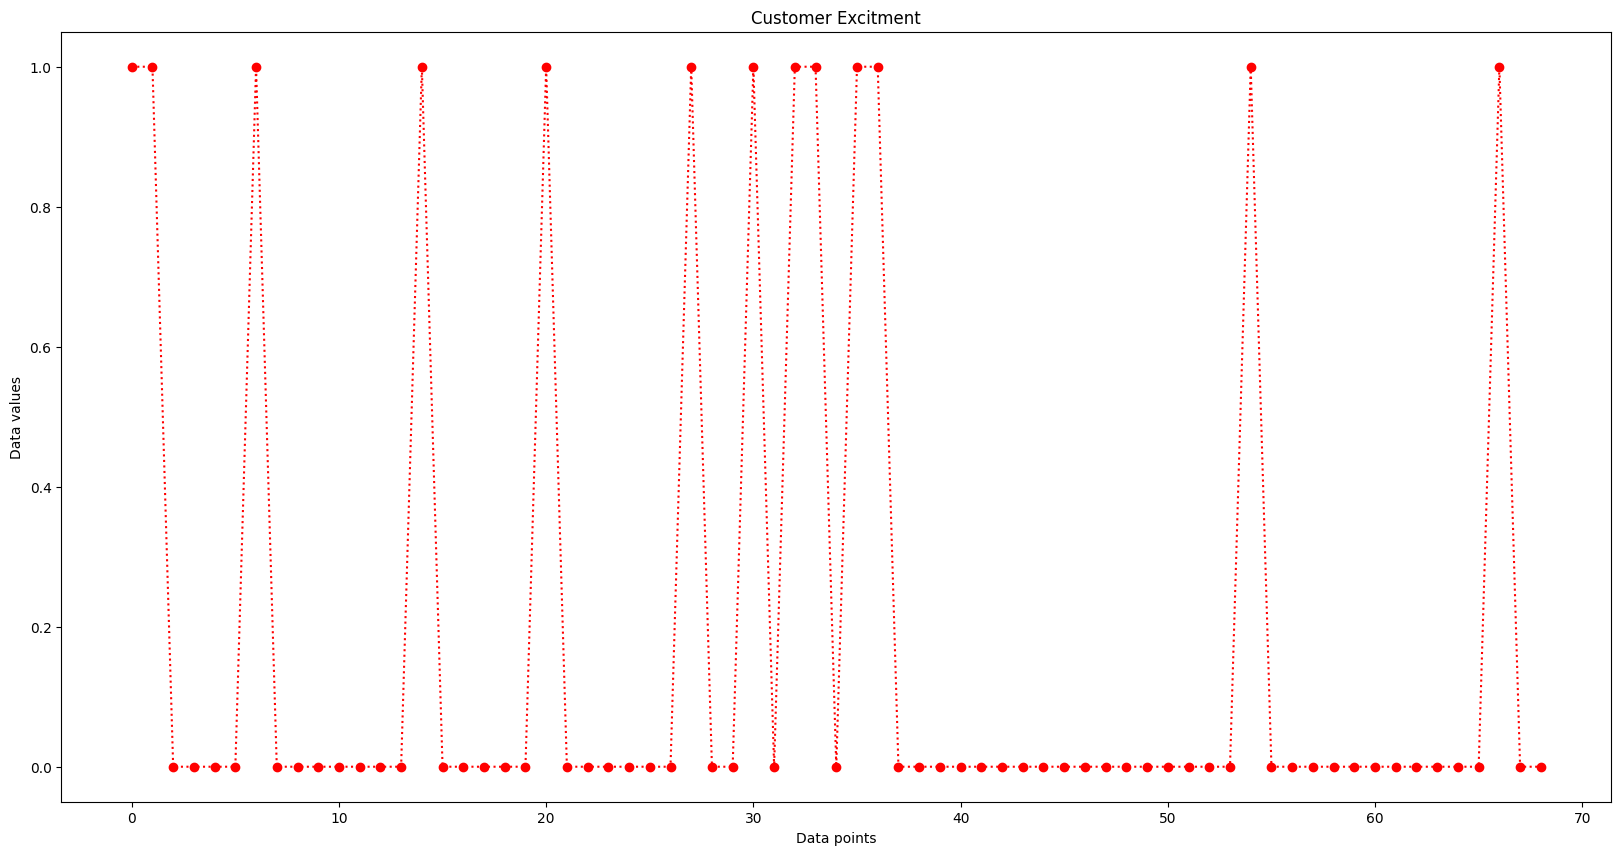

In [23]:
plt.figure(figsize=(20,10))

plt.plot(logistic_prediction,color='red',linestyle=':',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [24]:
logistic.score(x_test,y_test)

0.5507246376811594

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df=pd.DataFrame(scale.fit_transform(x,y))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.729542,1.199159,0.688737,-0.801052,1.347111,0.542950,-0.916282,-0.347965,-0.190906,-1.047504,-0.864196,-0.493887,1.087908,0.237828,-0.488358,0.037380
1,-1.724522,0.686834,-1.451933,-0.751240,0.450548,0.542950,0.170499,-0.347965,-0.615536,-1.047504,-0.864196,-0.493887,-0.919195,0.237828,-0.139591,-0.195413
2,-1.719502,-0.386490,-1.451933,-0.167856,-0.604823,-1.783978,-0.916282,-0.347965,-0.291083,-1.047504,-0.864196,-0.493887,1.087908,0.237828,0.557943,-0.195413
3,-1.714481,-0.038941,-1.451933,-0.835667,1.355152,-1.783978,-0.644587,-0.850257,-0.664877,0.954650,1.157144,1.769760,1.087908,0.237828,-1.069637,-0.195413
4,-1.709461,0.353783,0.688737,-0.962306,0.685745,0.542950,-0.372892,-0.347965,-0.078768,0.954650,1.157144,2.387119,-0.919195,0.237828,-0.720870,-0.165066


In [26]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [27]:
knn.score(x_test,y_test)

0.4927536231884058

In [28]:
accuracy_rate=[]
for i in range(1,40):


    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    accuracy_rate.append(score)

Text(0, 0.5, 'accuracy_rate')

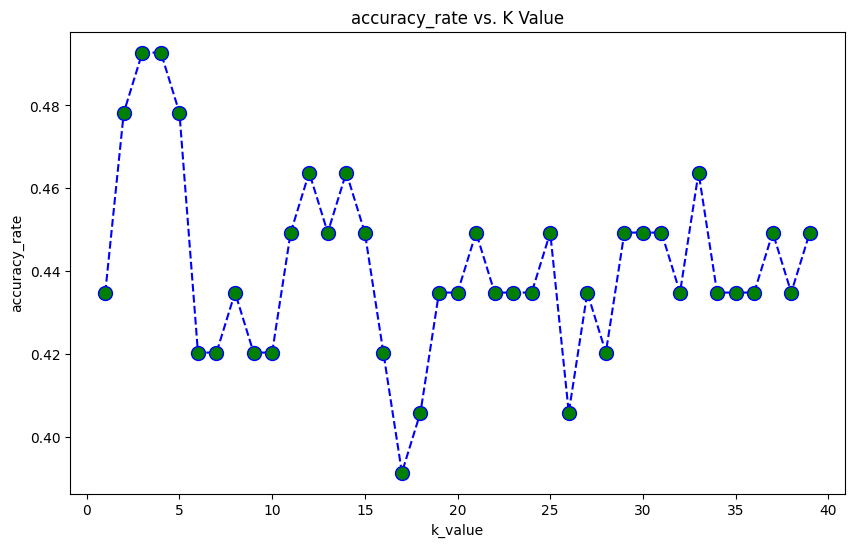

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='green',markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('k_value')
plt.ylabel('accuracy_rate')

In [30]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

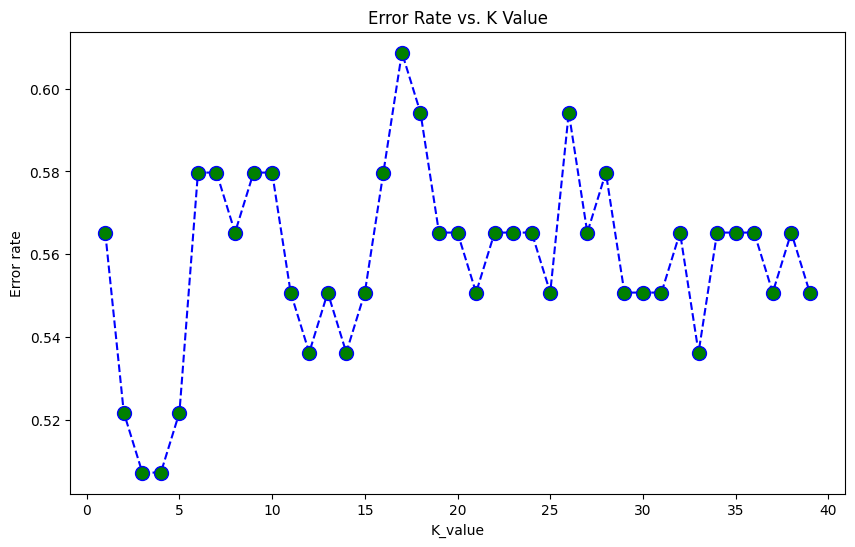

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',
        markerfacecolor='green',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Error rate')

In [32]:
knn_x=KNeighborsClassifier(n_neighbors=3)
knn_x.fit(x_train,y_train)
knn_x.score(x_test,y_test)

0.4927536231884058

In [33]:
knn_y=KNeighborsClassifier(n_neighbors=5)
knn_y.fit(x_train,y_train)
knn_y.score(x_test,y_test)

0.4782608695652174

In [34]:
knn_predict=knn_x.predict(x_test)
knn_predict

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])

Text(0, 0.5, 'Data values')

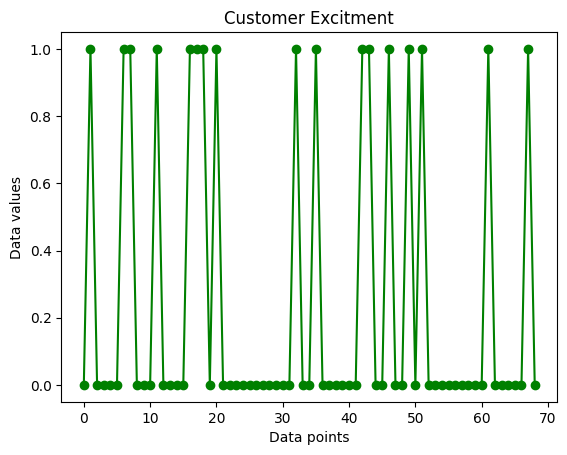

In [35]:
plt.plot(knn_predict,color='green',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [36]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [37]:
guassian_pred=naive.predict(x_test)
guassian_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1])

Text(0, 0.5, 'Data values')

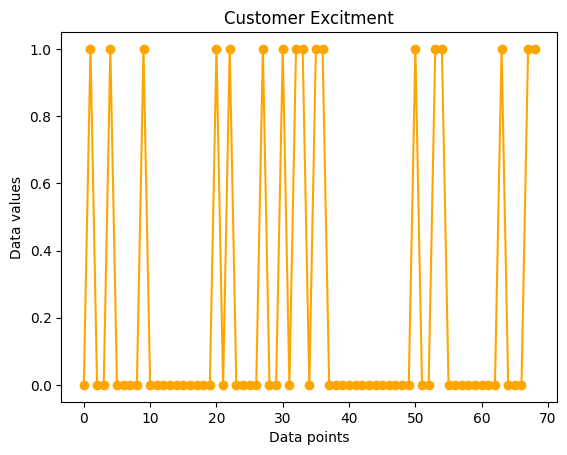

In [38]:
plt.plot(guassian_pred,color='orange',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [39]:
naive.score(x_test,y_test)

0.6376811594202898

In [40]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
random_pred=random.predict(x_test)
random_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [42]:
random.score(x_test,y_test)

0.8840579710144928

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
decision_pred=tree.predict(x_test)

In [45]:
tree.score(x_test,y_test)

0.8405797101449275

In [46]:
import xgboost as xgb
boost=xgb.XGBClassifier()
boost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [47]:
boost_pred=boost.predict(x_test)

In [48]:
boost.score(x_test,y_test)

0.8985507246376812

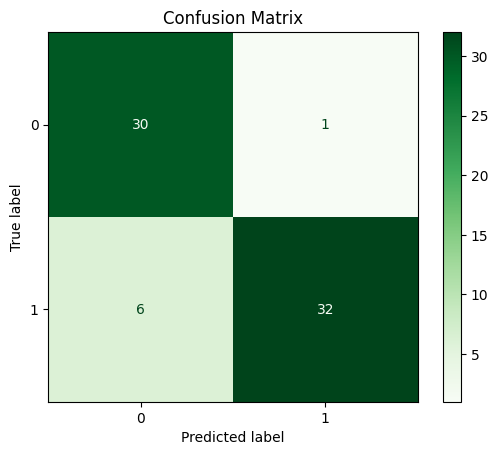

In [49]:
cm = confusion_matrix(y_test, boost_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

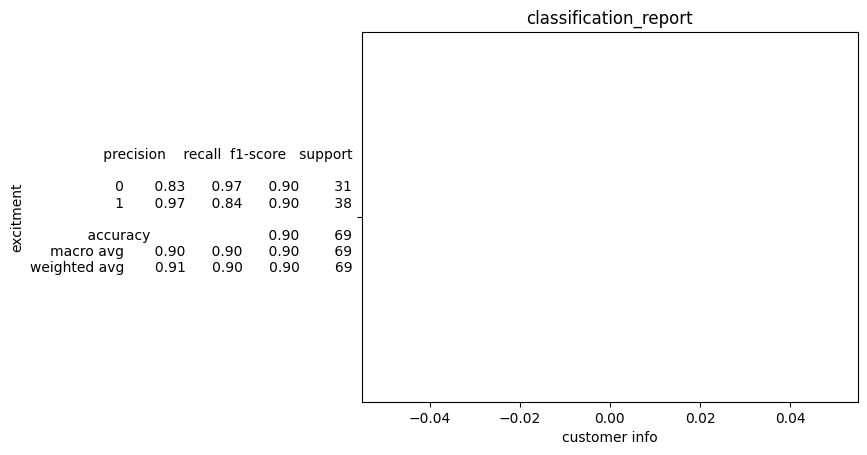

In [50]:
cr= classification_report(y_test, boost_pred)
plt.plot(cr)
plt.title("classification_report")
plt.xlabel('customer info')
plt.ylabel('excitment')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [55]:

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1, 5, 10]
}

gdc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, return_train_score=True)

In [56]:
gdc

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10]}, return_train_score=True)

In [57]:
gdc.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10]}, return_train_score=True)

In [58]:
gdc.best_params_

{'n_estimators': 10}

In [59]:
from sklearn import svm

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params': {
            'gamma': [1, 10, 20],
            'C': [1, 10, 20],
            'kernel': ['rbf', 'poly', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    }
}


In [ ]:
scores = []  

for model_name in model_params:
    mp = model_params[model_name]  
    gds = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    gds.fit(x, y)  
    scores.append({
        'model': model_name,
        'best_score': gds.best_score_,
        'best_params': gds.best_params_
    })


In [ ]:
scores

In [ ]:
models={'logistic':{'model':LogisticRegression(),'params':{}},
        'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},
        'Gaussian':{'model':GaussianNB(),'params':{}},
        'SVM':{'model':SVC(),'params':{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['poly','linear','sigmoid','rbf']}}}


In [ ]:
result=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x,y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result.append(t_res)
        